In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

In [2]:
df = pd.read_csv("Red_Wine_Quality.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Description of attributes:
1. fixed acidity (tartaric acid - g / dm^3) : most acids involved with wine or fixed or nonvolatile (do not evaporate readily)

2. volatile acidity (acetic acid - g / dm^3) : the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste

3. citric acid (g / dm^3) : found in small quantities, citric acid can add ‘freshness’ and flavor to wines

4. residual sugar (g / dm^3) : the amount of sugar remaining after fermentation stops, it’s rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet

5. chlorides (sodium chloride - g / dm^3) : the amount of salt in the wine

6. free sulfur dioxide (mg / dm^3) : the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine

7. total sulfur dioxide (mg / dm^3) : amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine

8. density (g / cm^3) : the density of water is close to that of water depending on the percent alcohol and sugar content

9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale

10. sulphates (potassium sulphate - g / dm3) : a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant

11. alcohol (% by volume) : the percent alcohol content of the wine

12. quality (score between 0 and 10)

In [3]:
df.columns = (['fixed_acidity','volatile_acidity','citric_acid','residual_sugar','chlorides','free_sulfur_dioxide','total_sulfur_dioxide','density','pH','sulphates','alcohol','quality'])

In [4]:
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed_acidity         1599 non-null   float64
 1   volatile_acidity      1599 non-null   float64
 2   citric_acid           1599 non-null   float64
 3   residual_sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free_sulfur_dioxide   1599 non-null   float64
 6   total_sulfur_dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


## Univariate Visualization :

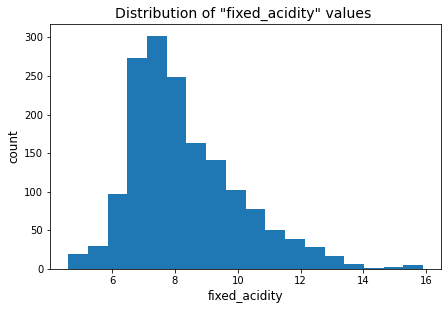

In [7]:
# fixed_acidity :
plt.figure(figsize = [7,4.5])
plt.hist(data = df, x = 'fixed_acidity', bins = 18);
plt.title('Distribution of "fixed_acidity" values ', size = 14);
plt.xlabel("fixed_acidity", size = 12);
plt.ylabel("count", size = 12);

* distribution of "fixed_acidity" is Right-skewed.

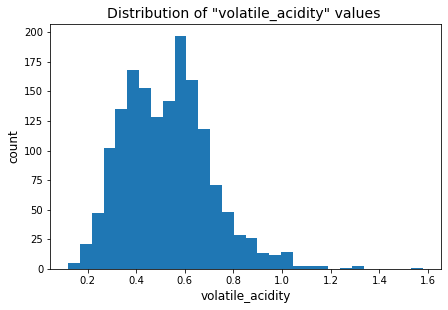

In [8]:
# volatile_acidity :
plt.figure(figsize = [7,4.5])
plt.hist(data = df, x = 'volatile_acidity', bins = 30);
plt.title('Distribution of "volatile_acidity" values ', size = 14);
plt.xlabel("volatile_acidity", size = 12);
plt.ylabel("count", size = 12);

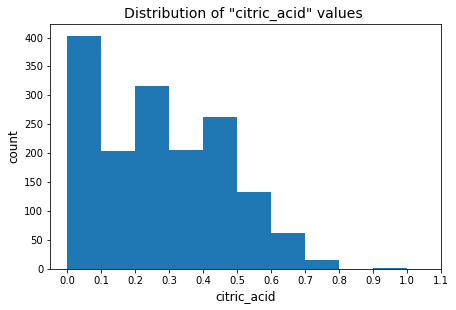

In [9]:
# citric_acid :
plt.figure(figsize = [7,4.5])
plt.hist(data = df, x = 'citric_acid');
plt.title('Distribution of "citric_acid" values ', size = 14);
plt.xticks([0,.1,.2,.3,.4,.5,.6,.7,.8,.9,1,1.1]);
plt.xlabel("citric_acid", size = 12);
plt.ylabel("count", size = 12);

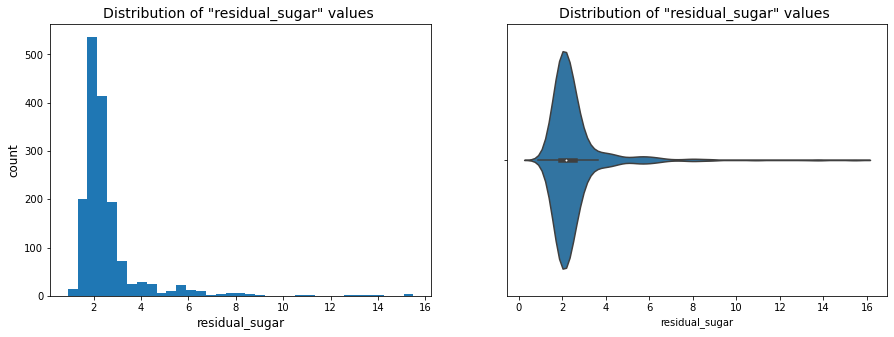

In [10]:
# residual_sugar :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
plt.hist(data = df, x = 'residual_sugar', bins = 35);
plt.title('Distribution of "residual_sugar" values ', size = 14);
plt.xlabel("residual_sugar", size = 12);
plt.ylabel("count", size = 12);

plt.subplot(1,2,2);
sb.violinplot(data = df, x =  'residual_sugar')
plt.title('Distribution of "residual_sugar" values ', size = 14);

In [11]:
df[df['residual_sugar'] <= 2.6].shape[0] / df.shape[0]

0.7779862414008756

* nearby 78% of records contain (residual_sugar) less than 2.6 g/dm^3

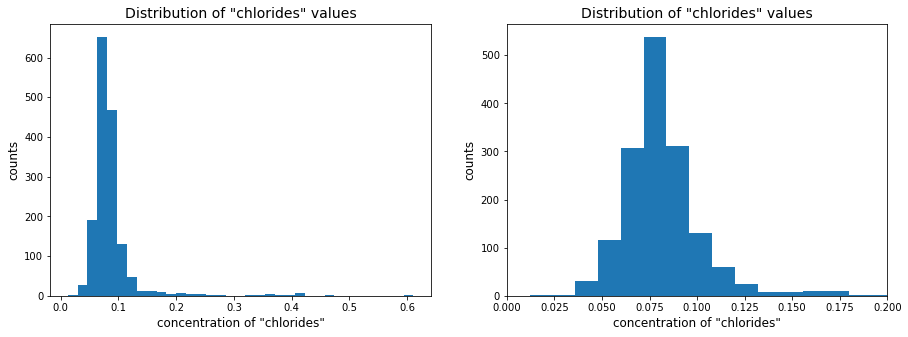

In [12]:
# chlorides :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
plt.hist(data = df, x = 'chlorides', bins = 35);
plt.title('Distribution of "chlorides" values', size = 14);
plt.xlabel('concentration of "chlorides"', size = 12);
plt.ylabel("counts", size = 12);

plt.subplot(1,2,2);
plt.hist(data = df, x = 'chlorides', bins = 50);
plt.title('Distribution of "chlorides" values', size = 14);
plt.xlim([0,0.2]);
plt.xlabel('concentration of "chlorides"', size = 12);
plt.ylabel("counts", size = 12);

In [13]:
df[df['chlorides'] <= 0.2].shape[0] / df.shape[0]

0.9743589743589743

#### After limiting our chlorides values ( <= 0.2 ) we can see that :
1. 97.5% of our data records have chlorides with value ( <= 0.2 )
2. those records are normally distributed 

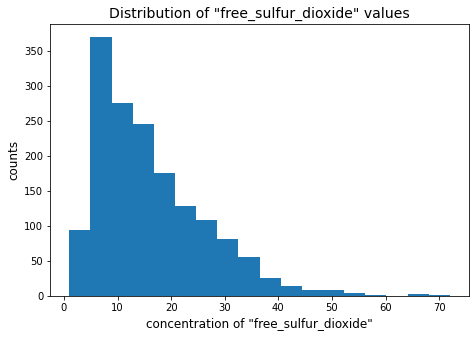

In [14]:
# free_sulfur_dioxide :
plt.figure(figsize = [7.5,5]);
plt.hist(data = df, x = 'free_sulfur_dioxide', bins = 18);
plt.title('Distribution of "free_sulfur_dioxide" values', size = 14);
plt.xlabel('concentration of "free_sulfur_dioxide"', size = 12);
plt.ylabel("counts", size = 12);

* Distribution of "free_sulfur_dioxide" values is Right-Skewed.

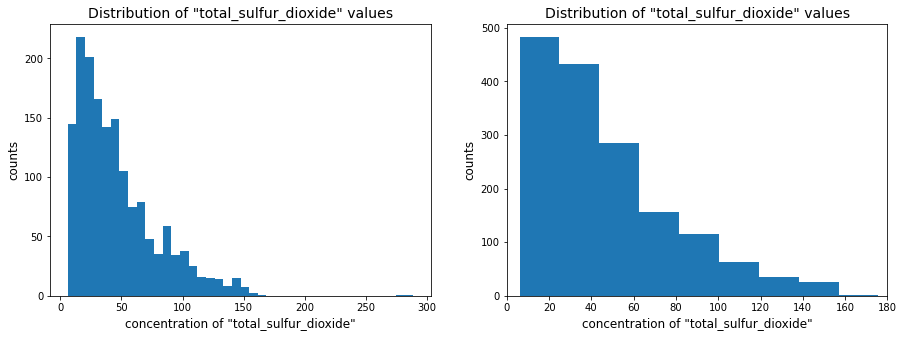

In [15]:
# total_sulfur_dioxide :
plt.figure(figsize = [15,5]);
plt.subplot(1,2,1);
plt.hist(data = df, x = 'total_sulfur_dioxide', bins = 40);
plt.title('Distribution of "total_sulfur_dioxide" values', size = 14);
plt.xlabel('concentration of "total_sulfur_dioxide"', size = 12);
plt.ylabel("counts", size = 12);

plt.subplot(1,2,2);
plt.hist(data = df, x = 'total_sulfur_dioxide', bins = 15);
plt.title('Distribution of "total_sulfur_dioxide" values', size = 14);
plt.xlim([0,180]);
plt.xlabel('concentration of "total_sulfur_dioxide"', size = 12);
plt.ylabel("counts", size = 12);

* Distribution of "total_sulfur_dioxide" values is Right-skewed.
* as concentration of "total_sulfur_dioxide" increased, number of recordes with specific value decreased .

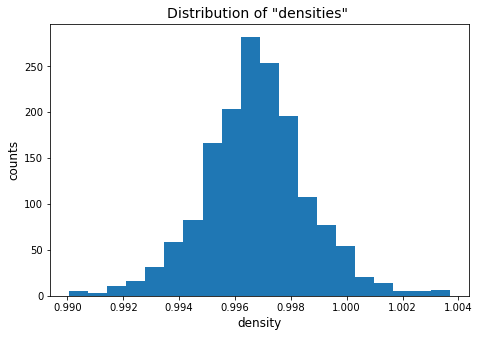

In [16]:
# density :
plt.figure(figsize = [7.5,5]);
plt.hist(data = df, x = 'density', bins = 20);
plt.title('Distribution of "densities" ', size = 14);
plt.xlabel('density', size = 12);
plt.ylabel("counts", size = 12);

* Distribution of densities is Normally Distributed

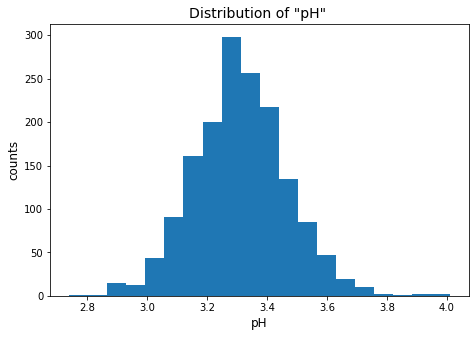

In [17]:
# pH :
plt.figure(figsize = [7.5,5]);
plt.hist(data = df, x = 'pH', bins = 20);
plt.title('Distribution of "pH" ', size = 14);
plt.xlabel('pH', size = 12);
plt.ylabel("counts", size = 12);

* Distribution of "pH" is Normally Distributed

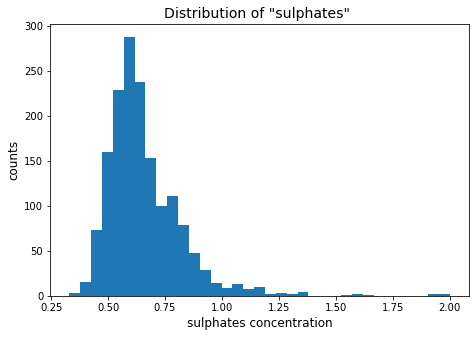

In [18]:
# sulphates :
plt.figure(figsize = [7.5,5]);
plt.hist(data = df, x = 'sulphates', bins = 35);
plt.title('Distribution of "sulphates" ', size = 14);
plt.xlabel('sulphates concentration', size = 12);
plt.ylabel("counts", size = 12);


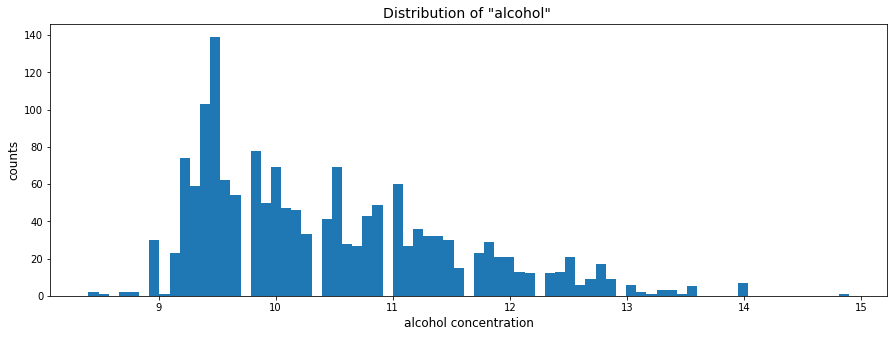

In [19]:
# alcohol :
plt.figure(figsize = [15,5]);
color = sb.color_palette()[0]
plt.hist(data = df, x = 'alcohol', bins = 75);
plt.title('Distribution of "alcohol" ', size = 14);
plt.xlabel('alcohol concentration', size = 12);
plt.ylabel("counts", size = 12);

* In general we can see that, as Alcohol Concentration increased, number of record with specific value of "Alcohol" decreased.

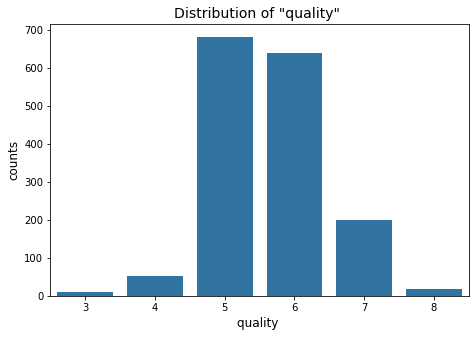

In [20]:
# quality :
plt.figure(figsize = [7.5,5]);
color = sb.color_palette()[0]
sb.countplot(data = df, x = 'quality', color = color);
plt.title('Distribution of "quality" ', size = 14);
plt.xlabel('quality ', size = 12);
plt.ylabel("counts", size = 12);

In [21]:
(df[df['quality'] == 5].shape[0] + df[df['quality'] == 6].shape[0]) / df.shape[0]

0.8248905565978737

* most of record have qualities = (5,6)  [ 82.5% of records ]

## Bivariate Visualization :

<Figure size 3600x3600 with 0 Axes>

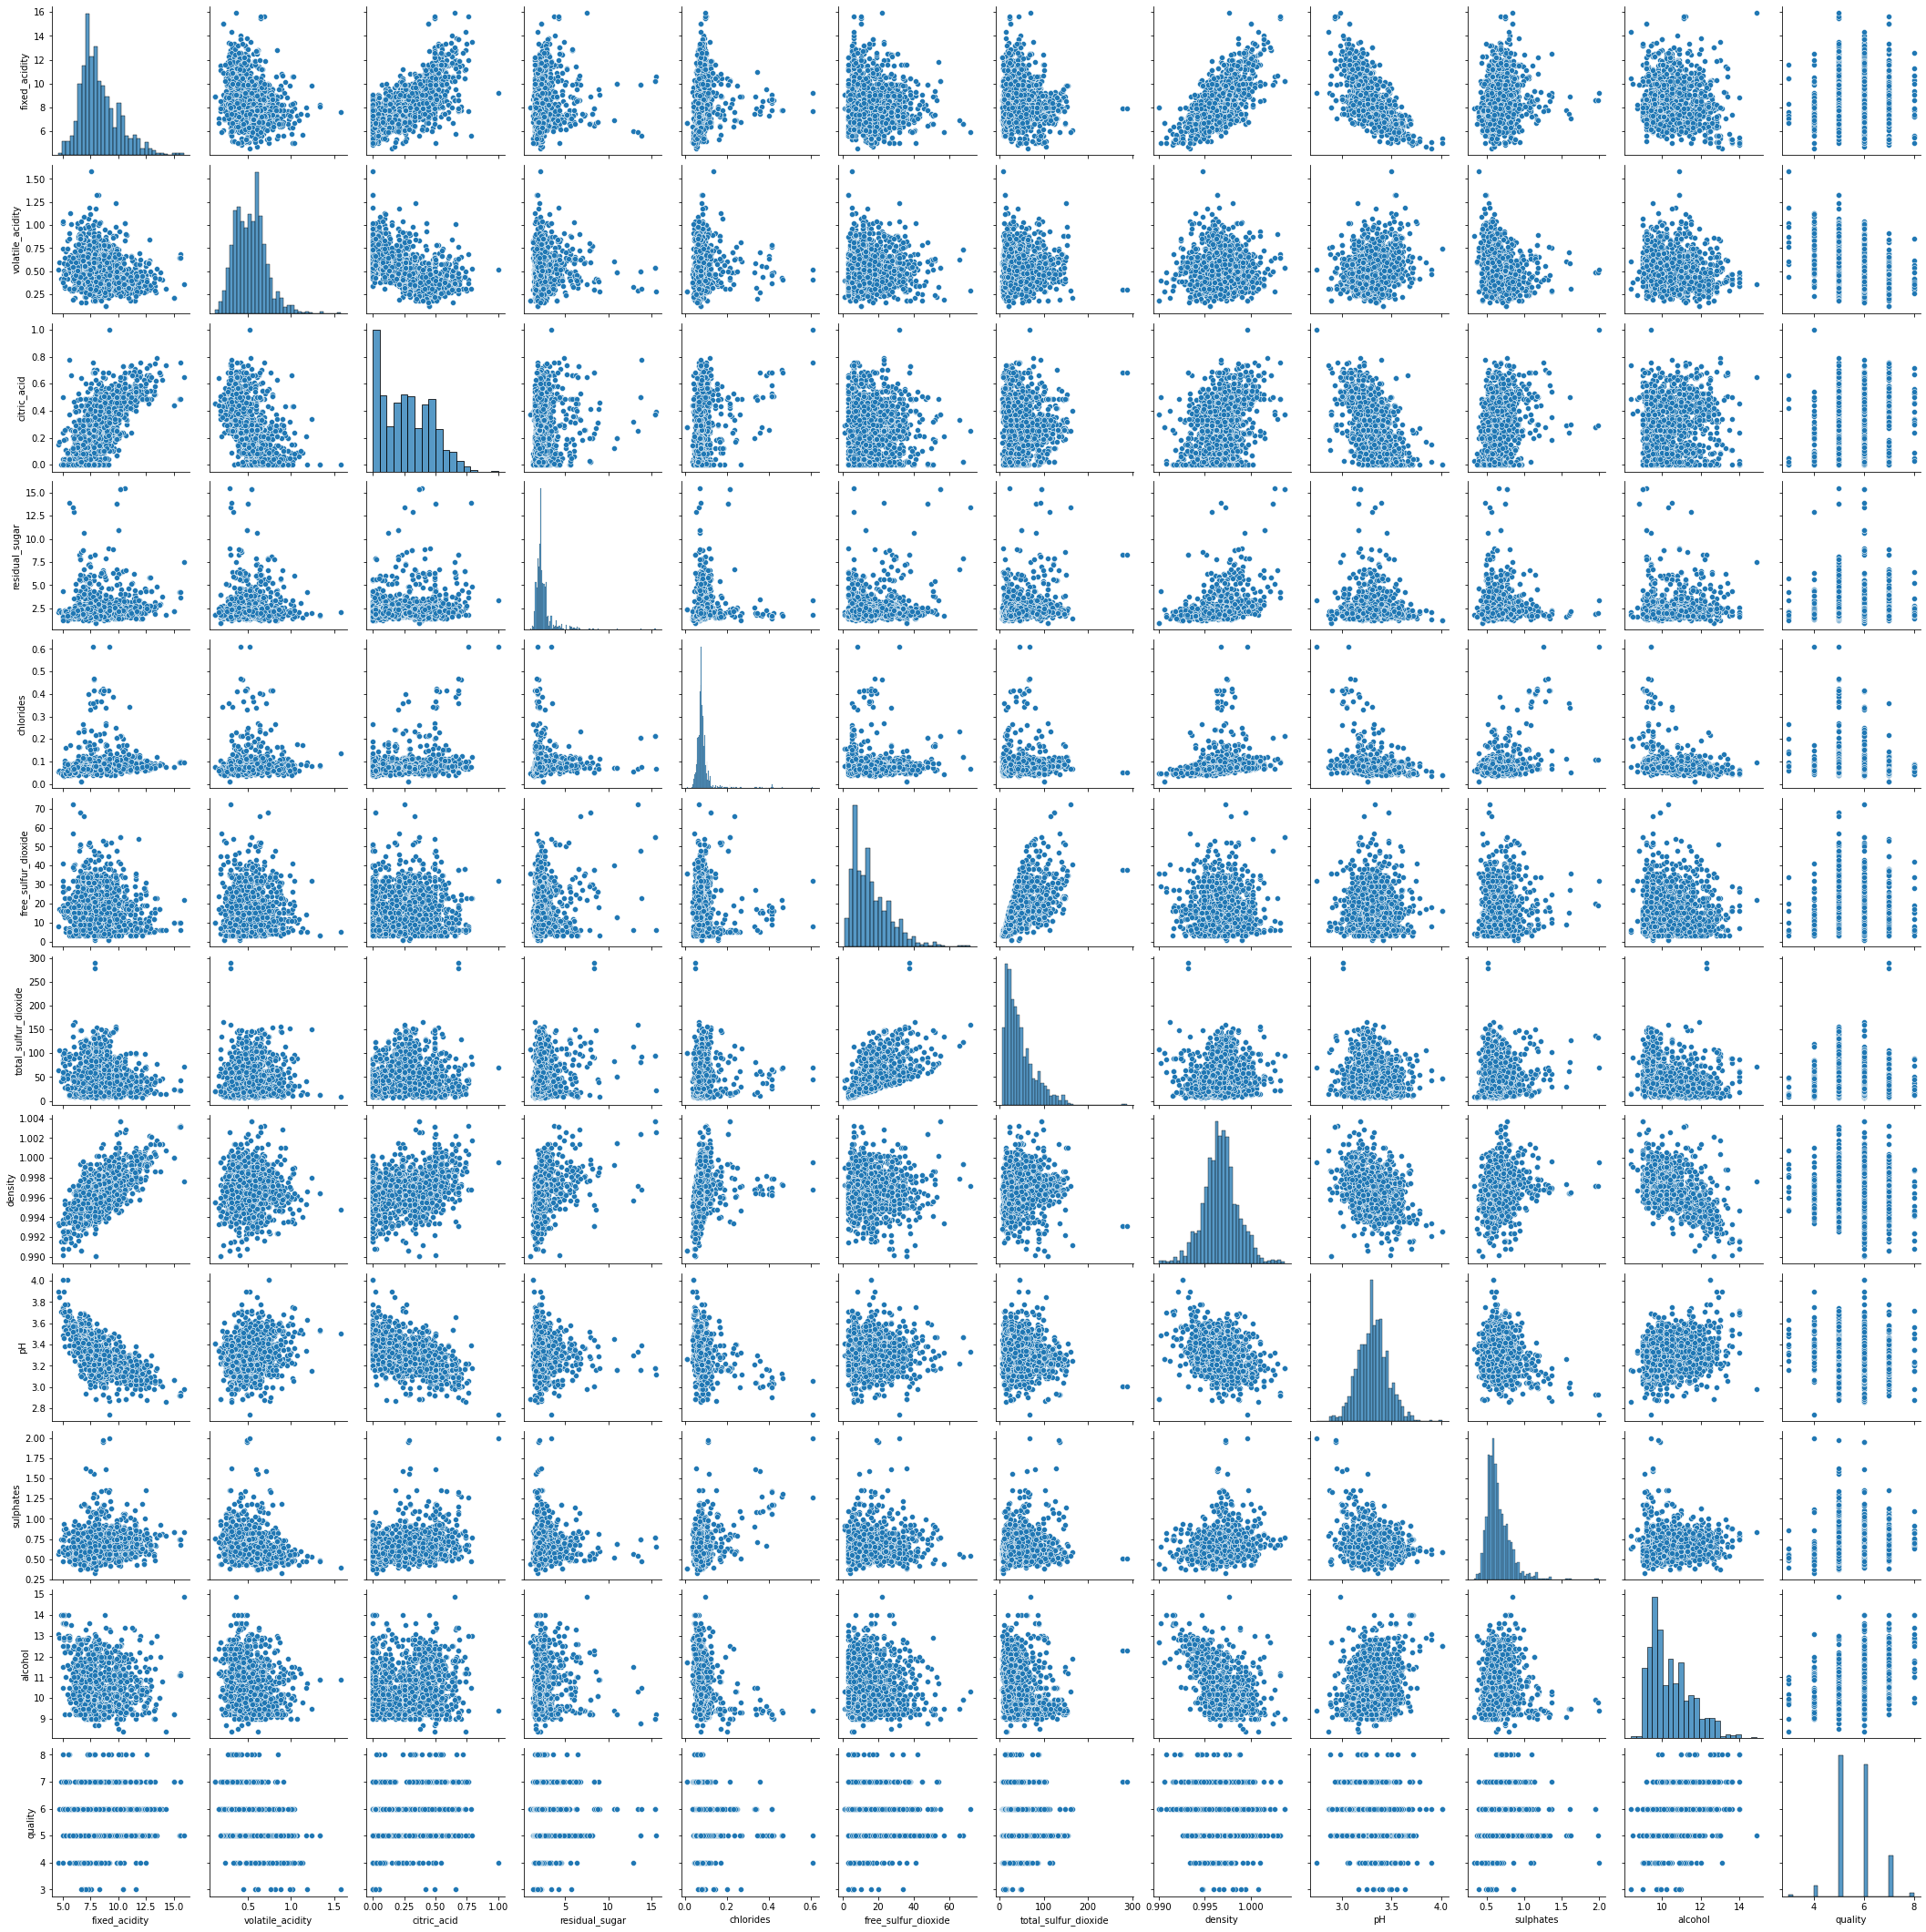

In [22]:
plt.figure(figsize = [50,50]);
sb.pairplot(df);

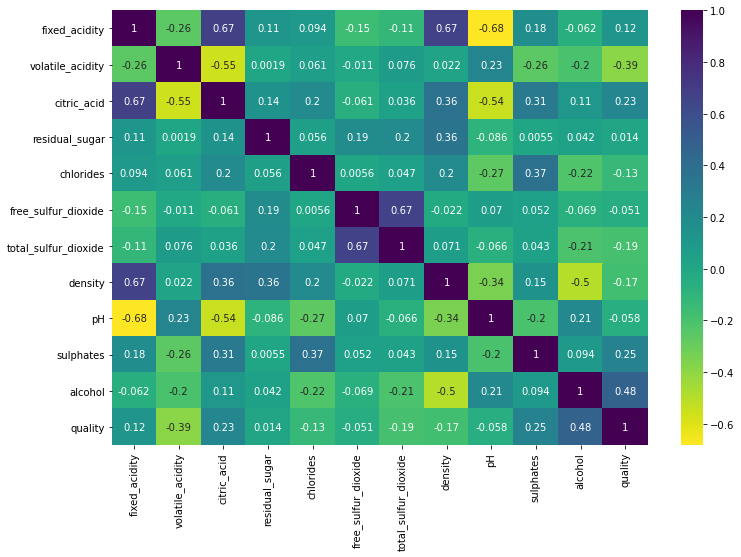

In [23]:
plt.figure(figsize = [12,8])
sb.heatmap(df.corr(), annot = True, cmap = 'viridis_r');

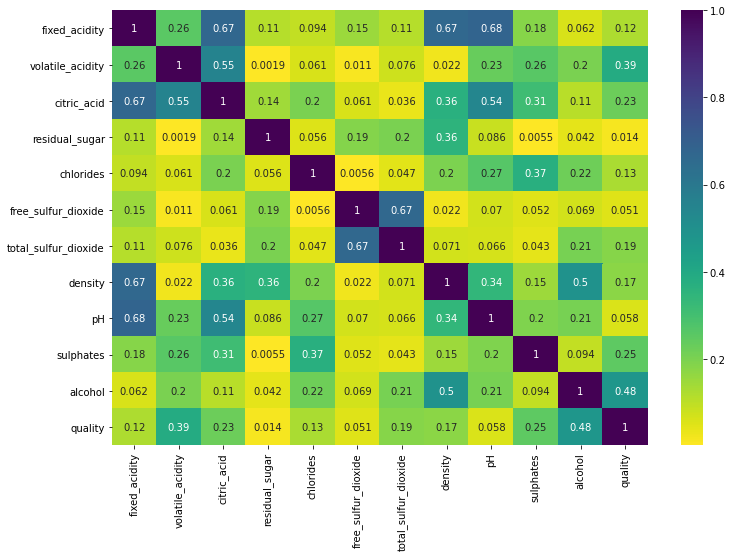

In [24]:
plt.figure(figsize = [12,8])
sb.heatmap(np.abs(df.corr()), annot = True, cmap = 'viridis_r');

### during our analysis we will choose to define the the value for ( I r I > 65 ) is storng corelation and ( 65 >= I r I >= 0.3 ) is moderate corelation

In [25]:
matrix = np.abs(df.corr())
matrix

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,0.256131,0.671703,0.114777,0.093705,0.153794,0.113181,0.668047,0.682978,0.183006,0.061668,0.124052
volatile_acidity,0.256131,1.000000,0.552496,0.001918,0.061298,0.010504,0.076470,0.022026,0.234937,0.260987,0.202288,0.390558
citric_acid,0.671703,0.552496,1.000000,0.143577,0.203823,0.060978,0.035533,0.364947,0.541904,0.312770,0.109903,0.226373
residual_sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,0.265026,0.371260,0.221141,0.128907
free_sulfur_dioxide,0.153794,0.010504,0.060978,0.187049,0.005562,1.000000,0.667666,0.021946,0.070377,0.051658,0.069408,0.050656
total_sulfur_dioxide,0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,0.066495,0.042947,0.205654,0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,0.021946,0.071269,1.000000,0.341699,0.148506,0.496180,0.174919
pH,0.682978,0.234937,0.541904,0.085652,0.265026,0.070377,0.066495,0.341699,1.000000,0.196648,0.205633,0.057731
sulphates,0.183006,0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,0.196648,1.000000,0.093595,0.251397


In [26]:
strong_cor = matrix[matrix > 0.65]
strong_cor

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,1.000000,NaN,0.671703,NaN,NaN,NaN,NaN,0.668047,0.682978,NaN,NaN,NaN
volatile_acidity,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
citric_acid,0.671703,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
residual_sugar,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
free_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,1.000000,0.667666,NaN,NaN,NaN,NaN,NaN
total_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,0.667666,1.000000,NaN,NaN,NaN,NaN,NaN
density,0.668047,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN
pH,0.682978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN
sulphates,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN


#### we can see that there is a strong corelation between :
1. citric_acid vs. fixed_acidity
2. density vs. fixed_acidity
3. pH vs. fixed_acidity
3. total_sulfur_dioxide vs. free_sulfur_dioxide

In [27]:
# moderate corelation ( 65 >=  r >= 0.3 )  )
moderate_cor = matrix[0.65 >= matrix]
moderate_cor = moderate_cor[moderate_cor >= 0.3]
moderate_cor

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
fixed_acidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
volatile_acidity,NaN,NaN,0.552496,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.390558
citric_acid,NaN,0.552496,NaN,NaN,NaN,NaN,NaN,0.364947,0.541904,0.31277,NaN,NaN
residual_sugar,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.355283,NaN,NaN,NaN,NaN
chlorides,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.37126,NaN,NaN
free_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
total_sulfur_dioxide,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
density,NaN,NaN,0.364947,0.355283,NaN,NaN,NaN,NaN,0.341699,NaN,0.496180,NaN
pH,NaN,NaN,0.541904,NaN,NaN,NaN,NaN,0.341699,NaN,NaN,NaN,NaN
sulphates,NaN,NaN,0.312770,NaN,0.37126,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### moderate corelation :
1. volatile_acidity vs. citric_acid
2. volatile_acidity vs. quality
3. citric_acid vs. density 
4. citric_acid vs. pH
5. citric_acid vs. sulphates
6. residual_sugar vs. density
7. chlorides vs. sulphates
8. density vs. pH
9. density vs. alcohol
10. alcohol vs. quality

### we can deduce that there is Multicollinearity between some variables !!

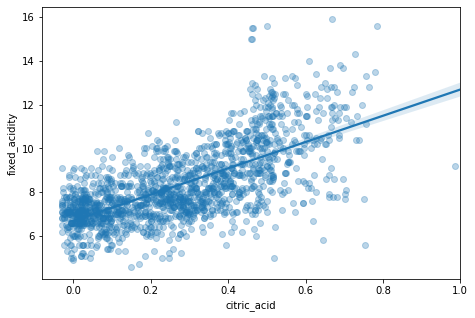

In [28]:
# citric_acid vs. fixed_acidity
plt.figure(figsize = [7.5,5]);
sb.regplot(data = df, x = 'citric_acid', y = 'fixed_acidity', scatter_kws={'alpha':0.3}, x_jitter = 0.03);

* as concentration of acitic acid increased, fixed acidity increased .

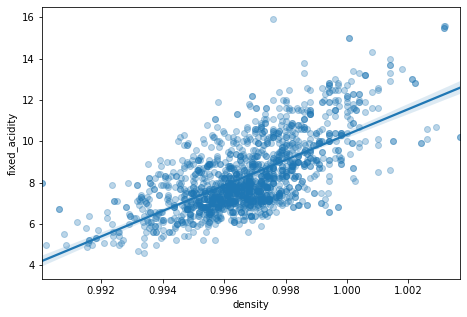

In [29]:
# density vs. fixed_acidity
plt.figure(figsize = [7.5,5]);
sb.regplot(data = df, x = 'density', y = 'fixed_acidity', scatter_kws={'alpha':0.3});

* as density of wine increased, fixed acidity increased .

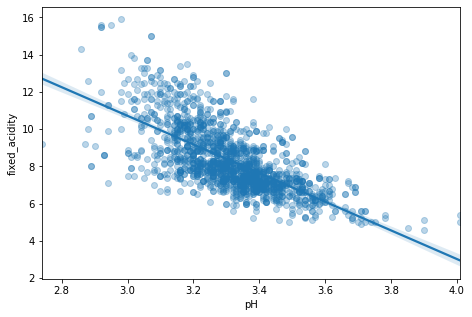

In [30]:
# pH vs. fixed_acidity
plt.figure(figsize = [7.5,5]);
sb.regplot(data = df, x = 'pH', y = 'fixed_acidity', scatter_kws={'alpha':0.3});

* it's know that pH values ranged between 0 ~ 14 , as pH decrased, the solution become more acidic 
#### we can see that concentration of citric acid and density of wine affect the fixed acidity of wine !!

In [31]:
# corelation with quality :
matrix.quality

fixed_acidity           0.124052
volatile_acidity        0.390558
citric_acid             0.226373
residual_sugar          0.013732
chlorides               0.128907
free_sulfur_dioxide     0.050656
total_sulfur_dioxide    0.185100
density                 0.174919
pH                      0.057731
sulphates               0.251397
alcohol                 0.476166
quality                 1.000000
Name: quality, dtype: float64

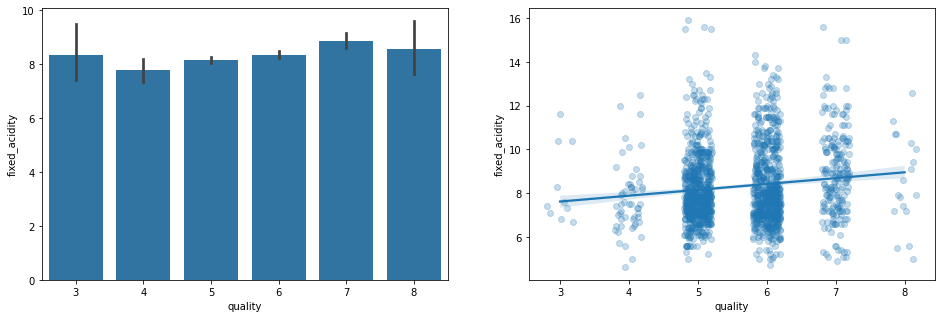

In [32]:
# fixed_acidity vs. quality :
plt.figure(figsize = [16,5]);
plt.subplot(1,2,1);
color = sb.color_palette()[0]
sb.barplot(data = df, x = 'quality', y = 'fixed_acidity', color = color);

plt.subplot(1,2,2);
color = sb.color_palette()[0]
sb.regplot(data = df, x = 'quality', y = 'fixed_acidity', color = color, x_jitter = 0.2, scatter_kws = {'alpha' : 0.25});

* there is poor relationship between fixed_acidity quality ( r = 0.124 ).
#### we will examine the relationships foe those variable with correlation cof > 0.20 :

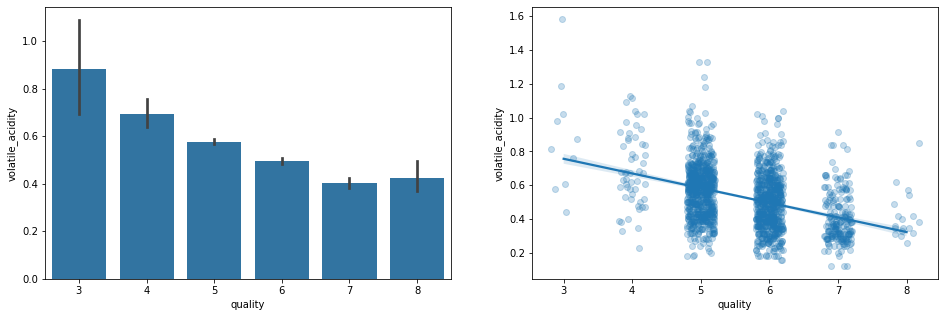

In [33]:
# volatile_acidity vs. quality :
plt.figure(figsize = [16,5]);
plt.subplot(1,2,1);
color = sb.color_palette()[0]
sb.barplot(data = df, x = 'quality', y = 'volatile_acidity', color = color);

plt.subplot(1,2,2);
color = sb.color_palette()[0]
sb.regplot(data = df, x = 'quality', y = 'volatile_acidity', color = color, x_jitter = 0.2, scatter_kws = {'alpha' : 0.25});

* we can see that as quality increased, volatile_acidity decreased ( r = -0.39 ) " moderate correlation "

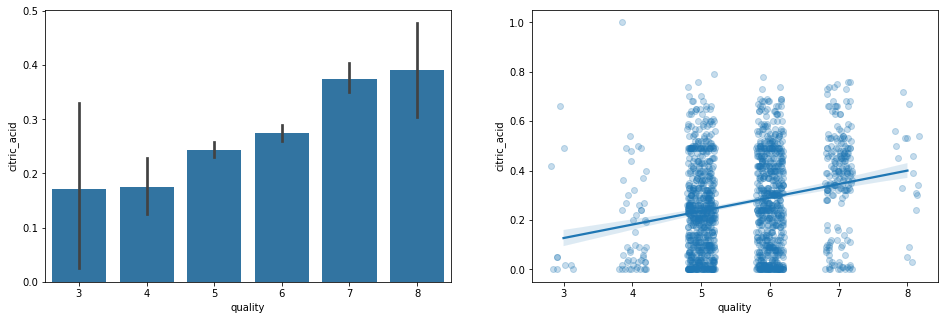

In [34]:
# citric_acid vs. quality :
plt.figure(figsize = [16,5]);
plt.subplot(1,2,1);
color = sb.color_palette()[0]
sb.barplot(data = df, x = 'quality', y = 'citric_acid', color = color);

plt.subplot(1,2,2);
color = sb.color_palette()[0]
sb.regplot(data = df, x = 'quality', y = 'citric_acid', color = color, x_jitter = 0.2, scatter_kws = {'alpha' : 0.25});

* quality increased by increasing the concentration of citric acid ( r = 0.27 ), " slightly poor correlation "

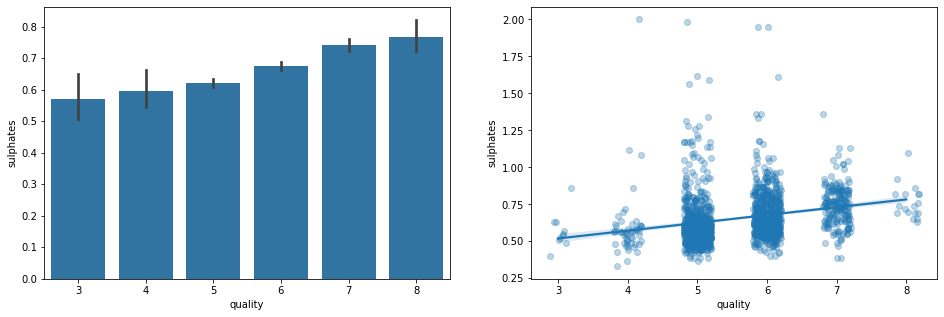

In [35]:
# sulphates vs. quality :
plt.figure(figsize = [16,5]);
plt.subplot(1,2,1);
color = sb.color_palette()[0]
sb.barplot(data = df, x = 'quality', y = 'sulphates', color = color);

plt.subplot(1,2,2);
color = sb.color_palette()[0]
sb.regplot(data = df, x = 'quality', y = 'sulphates', color = color, x_jitter = 0.2, scatter_kws = {'alpha' : 0.3});

* increasing concentration of sulphates is proportional to quality of wine ( r = 0.25 ).

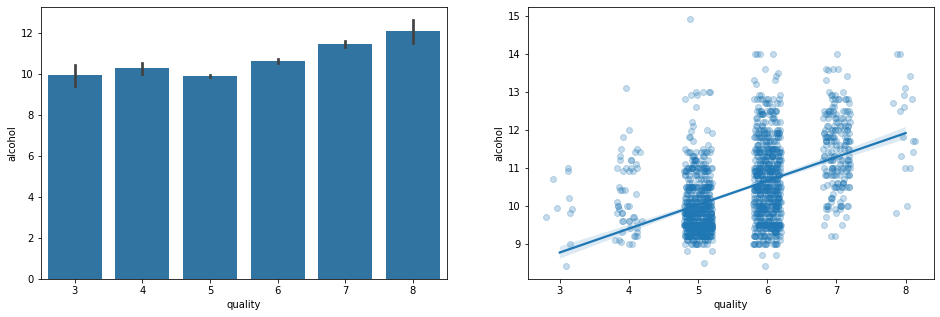

In [36]:
# alcohol vs. quality :
plt.figure(figsize = [16,5]);
plt.subplot(1,2,1);
color = sb.color_palette()[0]
sb.barplot(data = df, x = 'quality', y = 'alcohol', color = color);

plt.subplot(1,2,2);
color = sb.color_palette()[0]
sb.regplot(data = df, x = 'quality', y = 'alcohol', color = color, x_jitter = 0.2, scatter_kws = {'alpha' : 0.25});

* increasing concentration of alcohol is proportional to quality of wine ( r = 0.48 ), " moderate correlation ".

In [38]:
# variable with strong effect on wine quality among all variables :
df2 = df[['volatile_acidity','citric_acid','sulphates','alcohol','quality']]
df2.head()

,volatile_acidity,citric_acid,sulphates,alcohol,quality
0,0.70,0.00,0.56,9.4,5
1,0.88,0.00,0.68,9.8,5
2,0.76,0.04,0.65,9.8,5
3,0.28,0.56,0.58,9.8,6
4,0.70,0.00,0.56,9.4,5


### another way to see the relationship between quality with other variables :-

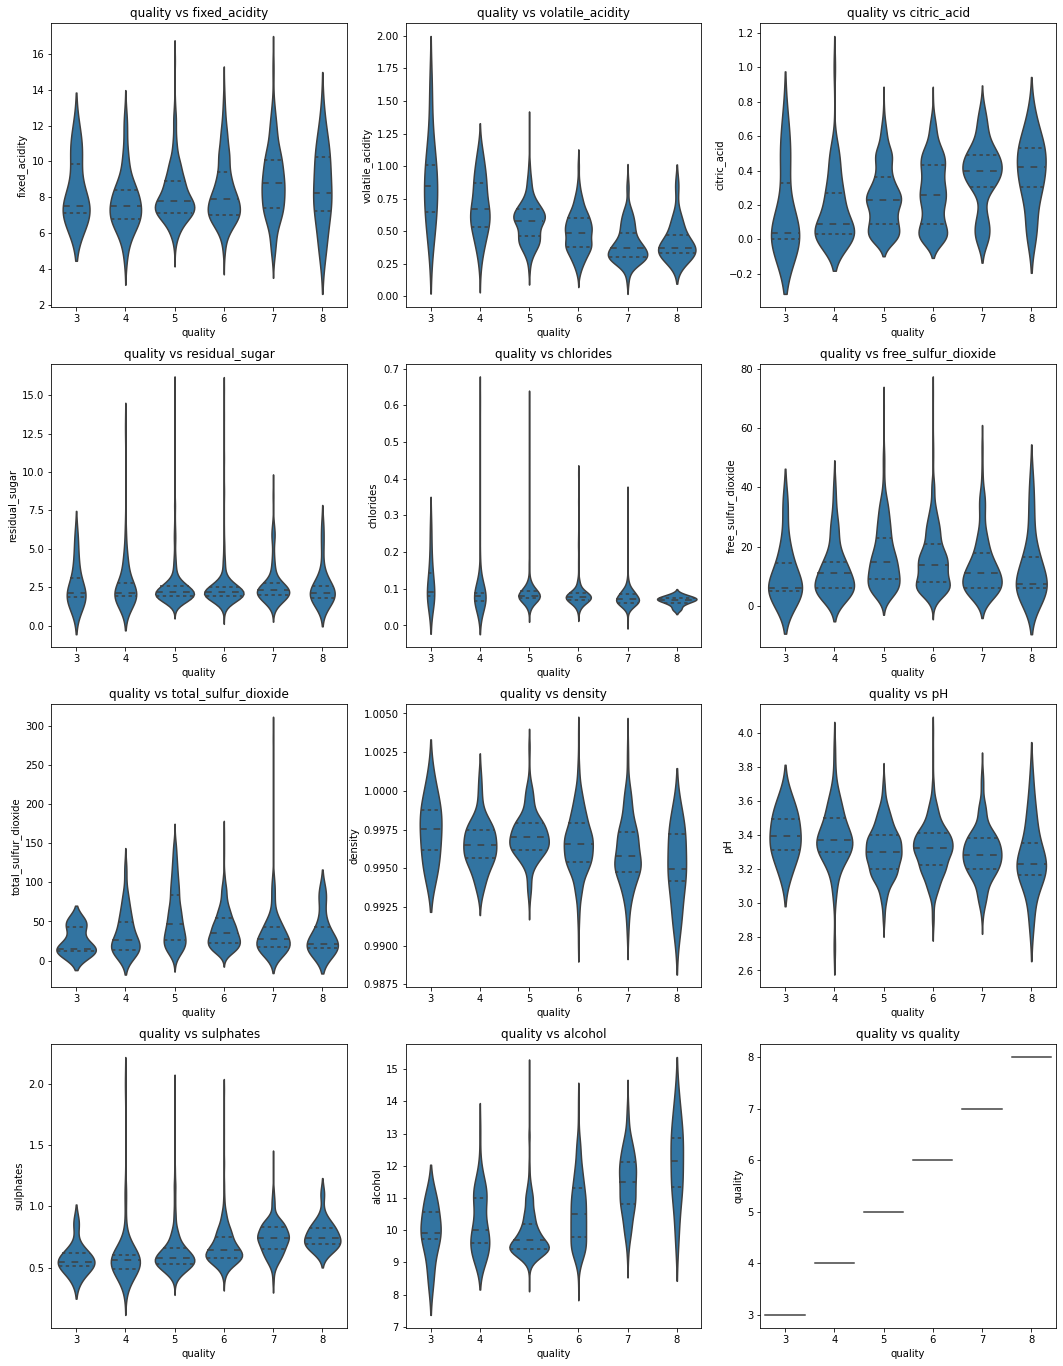

In [68]:
plt.figure(figsize = [18,24])
x = 1
for i in df.columns:
    plt.subplot(4,3,x);
    sb.violinplot(data = df, x = 'quality', y = i, inner = 'quartile', color = color);
    plt.title("quality vs {}".format(i));
    x = x + 1

#### from the previous visualization we can see that :
1. as quality increased, volatile acidity of wine decreased.
2. as quality increased, concentration of citric acid increased..
3. mean value of density for each quality of wine decreased as quality increased.
4. mean value of pH decreased as quality of wine increased.
5. concentration of sulphates increase with increasing wine quality.
6. alcohol concentration increase with increasing quality of wine.

#### here we could take in consideration the relation between quality vs. pH and quality vs. density, but in our analysis, we will work on our previous analysis where we take only the variable with r >= 0.2 w.r.t quality

In [73]:
df2.head()

,volatile_acidity,citric_acid,sulphates,alcohol,quality
0,0.70,0.00,0.56,9.4,5
1,0.88,0.00,0.68,9.8,5
2,0.76,0.04,0.65,9.8,5
3,0.28,0.56,0.58,9.8,6
4,0.70,0.00,0.56,9.4,5


### Multivariate Visualization :

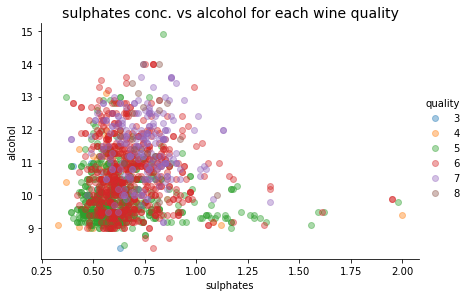

In [89]:
g = sb.FacetGrid(data = df, hue = 'quality', height = 4, aspect = 1.5);
g = g.map(sb.regplot, 'sulphates','alcohol', fit_reg = False, scatter_kws = {"alpha" : 0.4});
g.add_legend();
plt.title("sulphates conc. vs alcohol for each wine quality", size = 14);

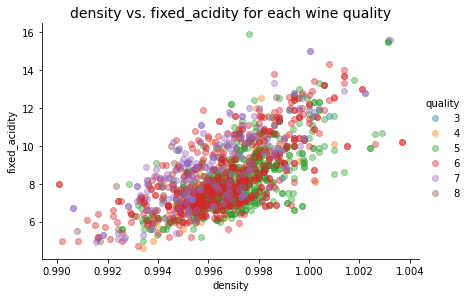

In [88]:
g = sb.FacetGrid(data = df, hue = 'quality', height = 4, aspect = 1.5);
g = g.map(sb.regplot, 'density','fixed_acidity', fit_reg = False, scatter_kws = {"alpha" : 0.4});
g.add_legend();
plt.title("density vs. fixed_acidity for each wine quality", size = 14);

#### there is no clear relationships !!!